In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, cifar10


(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0


(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = cifar10.load_data()
cifar_train_images = cifar_train_images / 255.0
cifar_test_images = cifar_test_images / 255.0



170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()


mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0


def create_fcnn(dropout_rate=0.0):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model


model = create_fcnn(dropout_rate=0.2)
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(mnist_train_images, mnist_train_labels, epochs=10, validation_split=0.2)


test_loss, test_acc = model.evaluate(mnist_test_images, mnist_test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3306 - accuracy: 0.9032 - val_loss: 0.1598 - val_accuracy: 0.9548
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1595 - accuracy: 0.9532 - val_loss: 0.1205 - val_accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1180 - accuracy: 0.9643 - val_loss: 0.0975 - val_accuracy: 0.9713
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0947 - accuracy: 0.9716 - val_loss: 0.0915 - val_accuracy: 0.9720
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0782 - accuracy: 0.9765 - val_loss: 0.0883 - val_accuracy: 0.9746
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0703 - accuracy: 0.9772 - val_loss: 0.0839 - val_accuracy: 0.9758
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0608 - accuracy: 0.9803 - val_loss: 0.0807 - val_accuracy:

#Droupout 0

Epoch 1/30
235/235 [==============================] - 5s 19ms/step - loss: 0.2491 - mse: 0.0621 - val_loss: 0.1817 - val_mse: 0.0394
Epoch 2/30
235/235 [==============================] - 5s 22ms/step - loss: 0.1669 - mse: 0.0343 - val_loss: 0.1533 - val_mse: 0.0297
Epoch 3/30
235/235 [==============================] - 5s 23ms/step - loss: 0.1491 - mse: 0.0283 - val_loss: 0.1432 - val_mse: 0.0264
Epoch 4/30
235/235 [==============================] - 9s 37ms/step - loss: 0.1416 - mse: 0.0258 - val_loss: 0.1373 - val_mse: 0.0245
Epoch 5/30
235/235 [==============================] - 9s 39ms/step - loss: 0.1361 - mse: 0.0240 - val_loss: 0.1324 - val_mse: 0.0229
Epoch 6/30
235/235 [==============================] - 8s 34ms/step - loss: 0.1315 - mse: 0.0225 - val_loss: 0.1289 - val_mse: 0.0217
Epoch 7/30
235/235 [==============================] - 6s 25ms/step - loss: 0.1285 - mse: 0.0215 - val_loss: 0.1264 - val_mse: 0.0208
Epoch 8/30
235/235 [==============================] - 4s 18ms/step - 

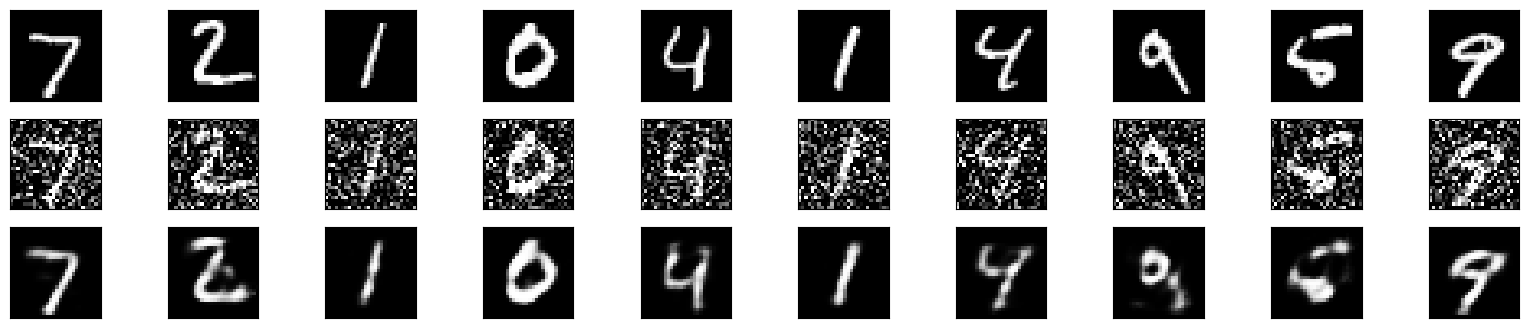

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.0)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#Dropout 0.2

Epoch 1/10
235/235 [==============================] - 8s 28ms/step - loss: 0.2625 - mse: 0.0666 - val_loss: 0.1882 - val_mse: 0.0416
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1925 - mse: 0.0432 - val_loss: 0.1679 - val_mse: 0.0347
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1800 - mse: 0.0389 - val_loss: 0.1583 - val_mse: 0.0313
Epoch 4/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1733 - mse: 0.0366 - val_loss: 0.1524 - val_mse: 0.0293
Epoch 5/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1691 - mse: 0.0352 - val_loss: 0.1479 - val_mse: 0.0279
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1662 - mse: 0.0342 - val_loss: 0.1456 - val_mse: 0.0271
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1641 - mse: 0.0335 - val_loss: 0.1432 - val_mse: 0.0263
Epoch 8/10
235/235 [==============================] - 5s 21ms/step - 

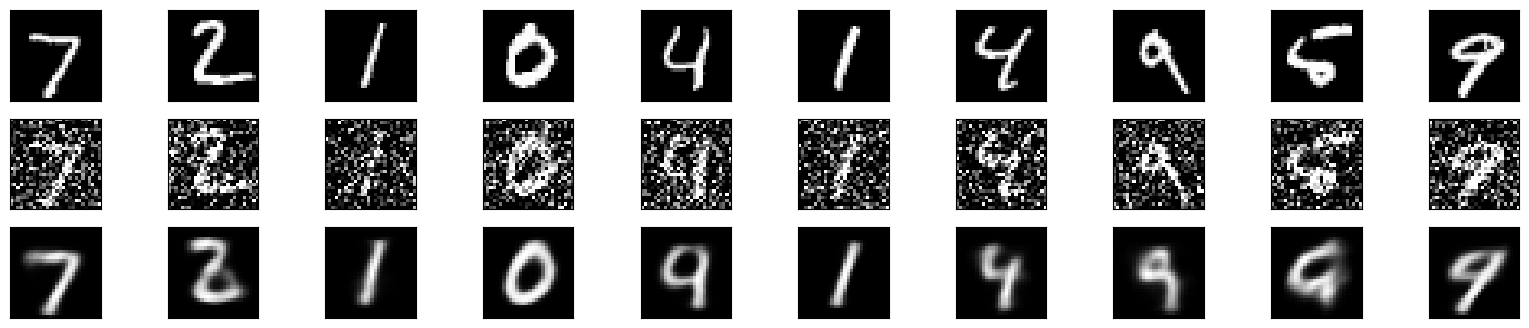

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.2)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#DROP OUT 0.5

Epoch 1/20
235/235 [==============================] - 8s 24ms/step - loss: 0.2937 - mse: 0.0763 - val_loss: 0.2290 - val_mse: 0.0558
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.2303 - mse: 0.0559 - val_loss: 0.1979 - val_mse: 0.0452
Epoch 3/20
235/235 [==============================] - 7s 30ms/step - loss: 0.2153 - mse: 0.0510 - val_loss: 0.1897 - val_mse: 0.0426
Epoch 4/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2097 - mse: 0.0492 - val_loss: 0.1853 - val_mse: 0.0411
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.2063 - mse: 0.0481 - val_loss: 0.1829 - val_mse: 0.0404
Epoch 6/20
235/235 [==============================] - 7s 30ms/step - loss: 0.2041 - mse: 0.0474 - val_loss: 0.1811 - val_mse: 0.0398
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2024 - mse: 0.0469 - val_loss: 0.1795 - val_mse: 0.0392
Epoch 8/20
235/235 [==============================] - 5s 23ms/step - 

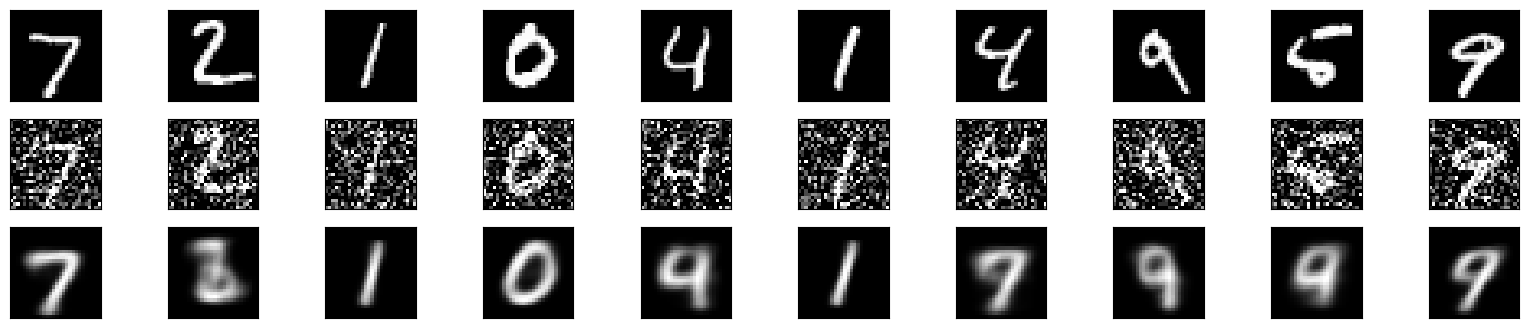

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.5)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#Drop out 0.75


Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.3253 - val_loss: 0.2600
Epoch 2/10
235/235 [==============================] - 6s 25ms/step - loss: 0.2616 - val_loss: 0.2512
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2569 - val_loss: 0.2466
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2535 - val_loss: 0.2418
Epoch 5/10
235/235 [==============================] - 6s 24ms/step - loss: 0.2494 - val_loss: 0.2349
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2453 - val_loss: 0.2321
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2433 - val_loss: 0.2308
Epoch 8/10
235/235 [==============================] - 6s 25ms/step - loss: 0.2417 - val_loss: 0.2293
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2409 - val_loss: 0.2286
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


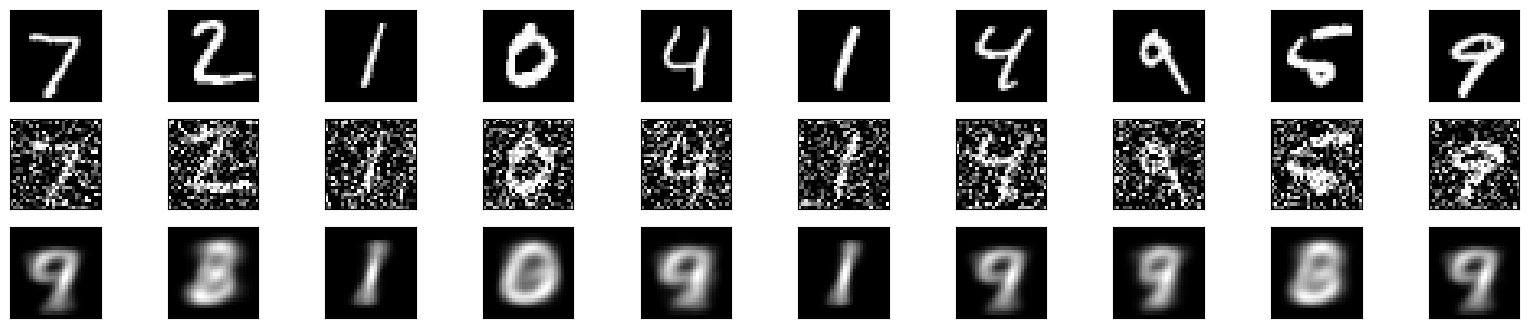

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.75)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



#Droput out 0.8


Epoch 1/10
235/235 [==============================] - 7s 22ms/step - loss: 0.3404 - val_loss: 0.2682
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2651 - val_loss: 0.2542
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.2604 - val_loss: 0.2511
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.2577 - val_loss: 0.2486
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2554 - val_loss: 0.2471
Epoch 6/10
235/235 [==============================] - 5s 22ms/step - loss: 0.2535 - val_loss: 0.2454
Epoch 7/10
235/235 [==============================] - 5s 23ms/step - loss: 0.2521 - val_loss: 0.2443
Epoch 8/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2504 - val_loss: 0.2407
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2483 - val_loss: 0.2369
Epoch 10/10
313/313 [==============================] - 1s 4ms/step


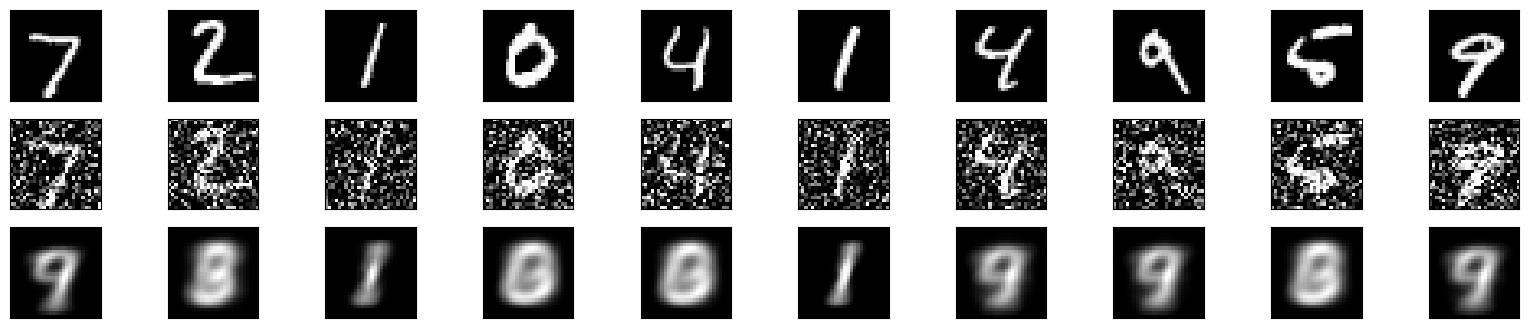

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.8)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#Trail 2


##Dropout 0.1

Epoch 1/10
235/235 [==============================] - 8s 27ms/step - loss: 0.2573 - mse: 0.0649 - val_loss: 0.1812 - val_mse: 0.0393
Epoch 2/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1784 - mse: 0.0384 - val_loss: 0.1566 - val_mse: 0.0308
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1644 - mse: 0.0336 - val_loss: 0.1464 - val_mse: 0.0274
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1573 - mse: 0.0312 - val_loss: 0.1407 - val_mse: 0.0254
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1530 - mse: 0.0298 - val_loss: 0.1367 - val_mse: 0.0241
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1500 - mse: 0.0288 - val_loss: 0.1340 - val_mse: 0.0233
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1476 - mse: 0.0280 - val_loss: 0.1318 - val_mse: 0.0225
Epoch 8/10
235/235 [==============================] - 5s 20ms/step - 

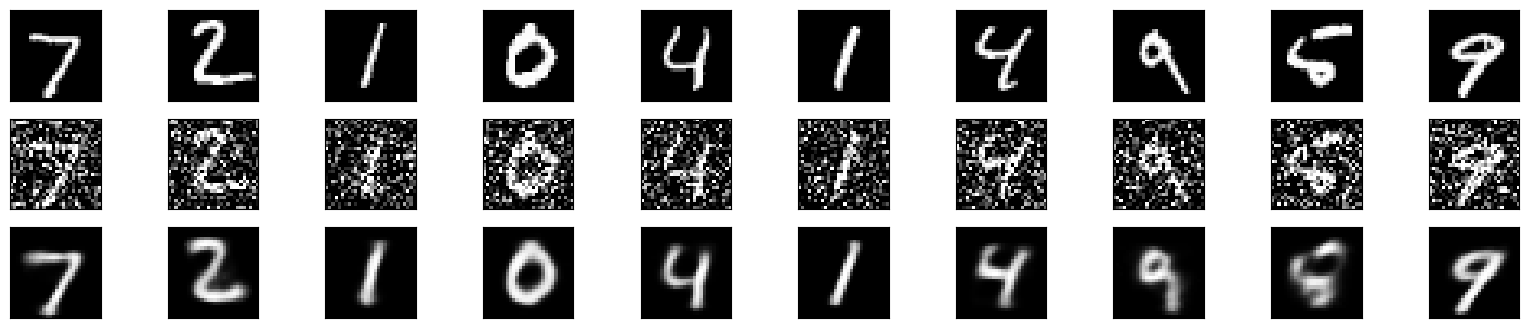

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.1)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##Dropout 0.2


Epoch 1/20
235/235 [==============================] - 6s 21ms/step - loss: 0.2627 - mse: 0.0666 - val_loss: 0.1870 - val_mse: 0.0413
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1908 - mse: 0.0427 - val_loss: 0.1674 - val_mse: 0.0344
Epoch 3/20
235/235 [==============================] - 7s 28ms/step - loss: 0.1788 - mse: 0.0385 - val_loss: 0.1578 - val_mse: 0.0312
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.1725 - mse: 0.0364 - val_loss: 0.1518 - val_mse: 0.0291
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1686 - mse: 0.0350 - val_loss: 0.1481 - val_mse: 0.0279
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 0.1656 - mse: 0.0340 - val_loss: 0.1458 - val_mse: 0.0271
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1636 - mse: 0.0333 - val_loss: 0.1433 - val_mse: 0.0263
Epoch 8/20
235/235 [==============================] - 6s 25ms/step - 

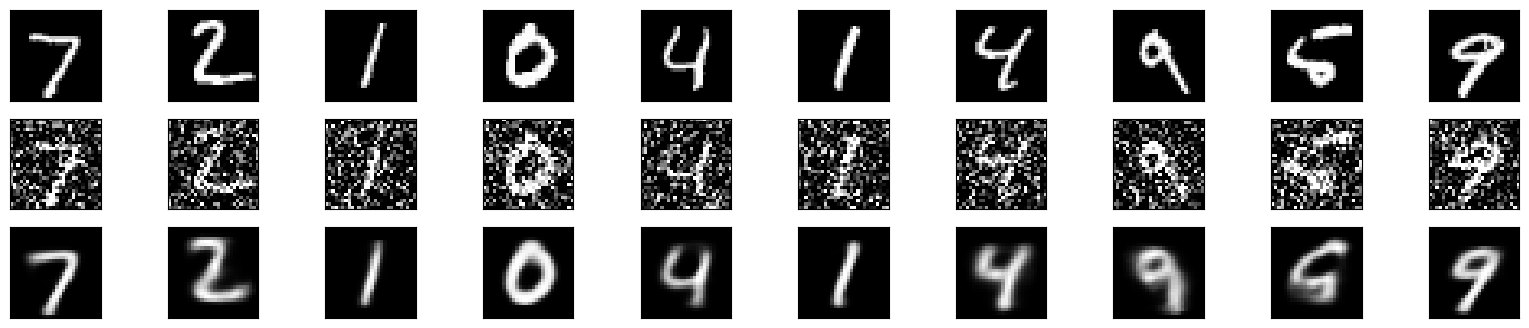

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.2)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##Droput 0.3

Epoch 1/10
235/235 [==============================] - 6s 21ms/step - loss: 0.2715 - val_loss: 0.1965
Epoch 2/10
235/235 [==============================] - 6s 24ms/step - loss: 0.2038 - val_loss: 0.1773
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1922 - val_loss: 0.1687
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1862 - val_loss: 0.1632
Epoch 5/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1825 - val_loss: 0.1592
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1800 - val_loss: 0.1574
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1781 - val_loss: 0.1555
Epoch 8/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1766 - val_loss: 0.1537
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1754 - val_loss: 0.1527
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


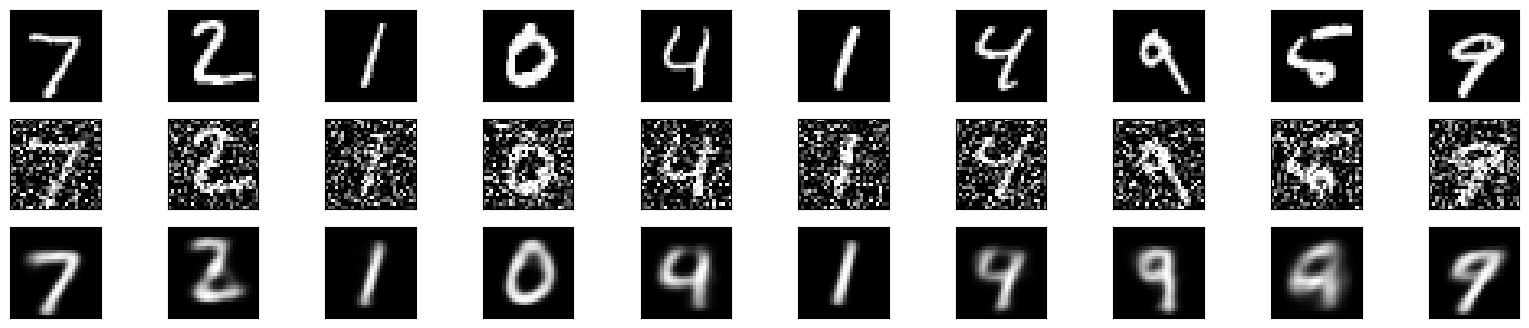

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.3)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##Dropout 0.4

Epoch 1/10
235/235 [==============================] - 6s 19ms/step - loss: 0.2839 - val_loss: 0.2184
Epoch 2/10
235/235 [==============================] - 6s 25ms/step - loss: 0.2175 - val_loss: 0.1890
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2041 - val_loss: 0.1802
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1984 - val_loss: 0.1746
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1951 - val_loss: 0.1722
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1925 - val_loss: 0.1693
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1908 - val_loss: 0.1685
Epoch 8/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1892 - val_loss: 0.1670
Epoch 9/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1882 - val_loss: 0.1661
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


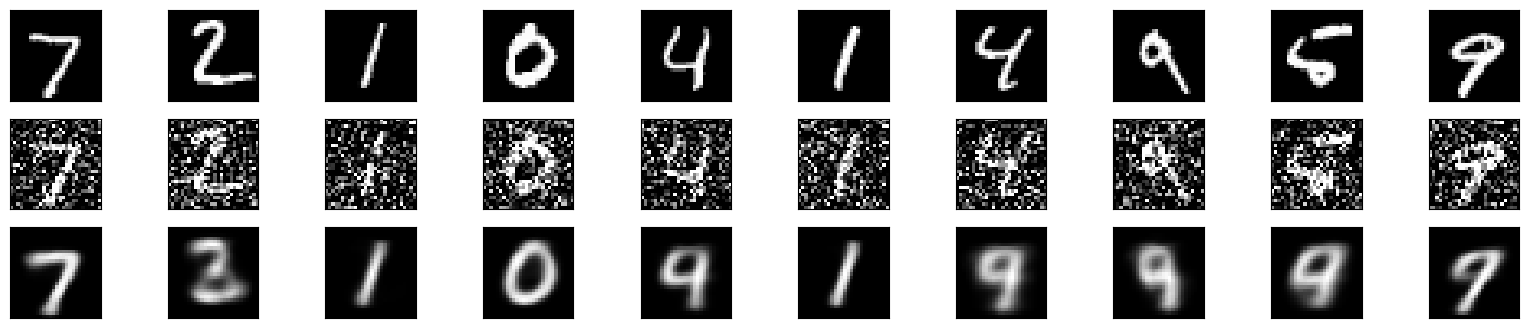

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.4)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##Dropout 0.5

Epoch 1/10
235/235 [==============================] - 9s 26ms/step - loss: 0.2925 - mse: 0.0759 - val_loss: 0.2291 - val_mse: 0.0560
Epoch 2/10
235/235 [==============================] - 6s 27ms/step - loss: 0.2326 - mse: 0.0568 - val_loss: 0.2051 - val_mse: 0.0478
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2179 - mse: 0.0519 - val_loss: 0.1936 - val_mse: 0.0440
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2119 - mse: 0.0500 - val_loss: 0.1888 - val_mse: 0.0423
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.2085 - mse: 0.0489 - val_loss: 0.1854 - val_mse: 0.0411
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2057 - mse: 0.0480 - val_loss: 0.1829 - val_mse: 0.0403
Epoch 7/10
235/235 [==============================] - 6s 25ms/step - loss: 0.2037 - mse: 0.0473 - val_loss: 0.1806 - val_mse: 0.0396
Epoch 8/10
235/235 [==============================] - 5s 22ms/step - 

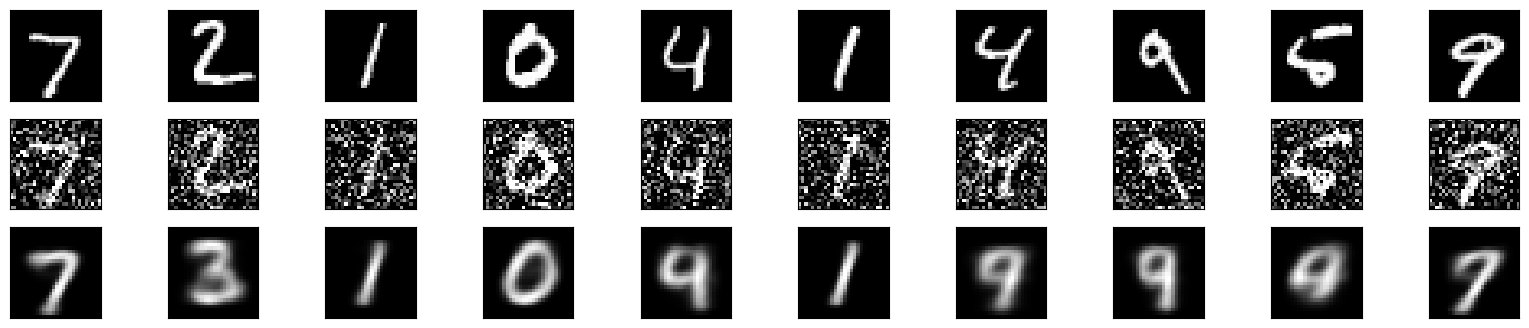

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.5)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#Dropout 0.05

Epoch 1/10
235/235 [==============================] - 8s 29ms/step - loss: 0.2571 - mse: 0.0649 - val_loss: 0.1834 - val_mse: 0.0401
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1745 - mse: 0.0370 - val_loss: 0.1546 - val_mse: 0.0302
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1575 - mse: 0.0313 - val_loss: 0.1430 - val_mse: 0.0263
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1498 - mse: 0.0287 - val_loss: 0.1368 - val_mse: 0.0243
Epoch 5/10
235/235 [==============================] - 7s 32ms/step - loss: 0.1450 - mse: 0.0271 - val_loss: 0.1325 - val_mse: 0.0229
Epoch 6/10
235/235 [==============================] - 8s 36ms/step - loss: 0.1413 - mse: 0.0259 - val_loss: 0.1294 - val_mse: 0.0218
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1384 - mse: 0.0249 - val_loss: 0.1271 - val_mse: 0.0210
Epoch 8/10
235/235 [==============================] - 7s 29ms/step - 

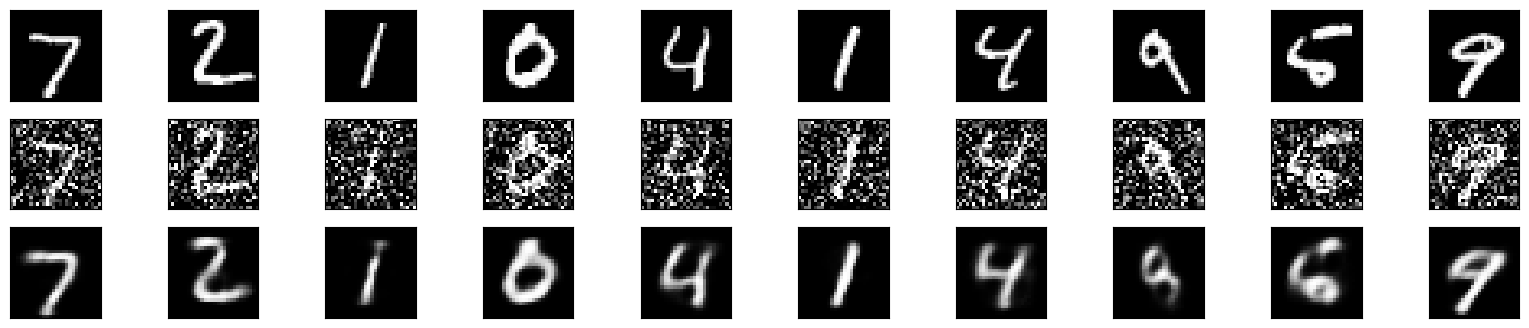

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.05)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##Dropout 0.01


Epoch 1/30
235/235 [==============================] - 6s 21ms/step - loss: 0.2510 - mse: 0.0628 - val_loss: 0.1762 - val_mse: 0.0374
Epoch 2/30
235/235 [==============================] - 7s 28ms/step - loss: 0.1663 - mse: 0.0342 - val_loss: 0.1494 - val_mse: 0.0284
Epoch 3/30
235/235 [==============================] - 5s 20ms/step - loss: 0.1501 - mse: 0.0287 - val_loss: 0.1388 - val_mse: 0.0249
Epoch 4/30
235/235 [==============================] - 5s 22ms/step - loss: 0.1422 - mse: 0.0261 - val_loss: 0.1325 - val_mse: 0.0229
Epoch 5/30
235/235 [==============================] - 6s 26ms/step - loss: 0.1370 - mse: 0.0244 - val_loss: 0.1285 - val_mse: 0.0216
Epoch 6/30
235/235 [==============================] - 5s 20ms/step - loss: 0.1334 - mse: 0.0232 - val_loss: 0.1251 - val_mse: 0.0205
Epoch 7/30
235/235 [==============================] - 6s 24ms/step - loss: 0.1307 - mse: 0.0223 - val_loss: 0.1232 - val_mse: 0.0199
Epoch 8/30
235/235 [==============================] - 5s 23ms/step - 

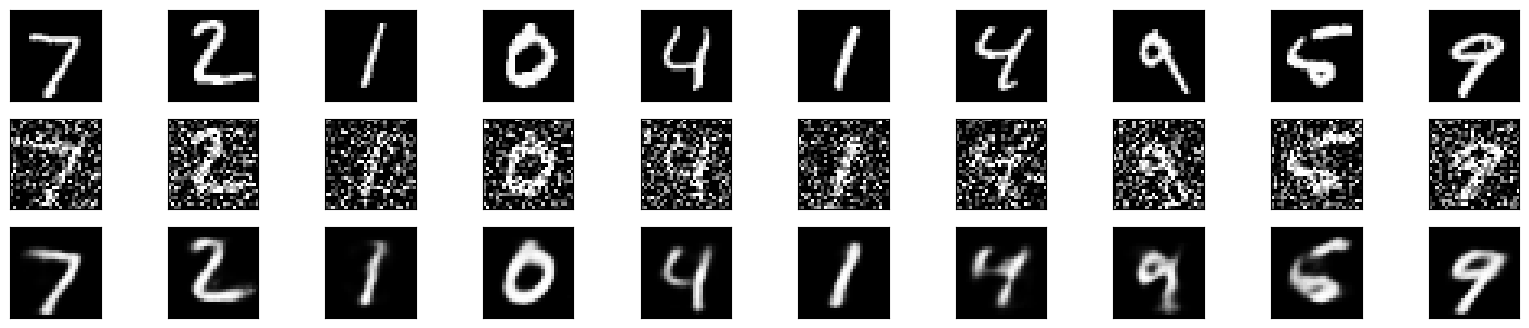

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.01)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##Dropout 0.06

Epoch 1/10
235/235 [==============================] - 6s 21ms/step - loss: 0.2552 - mse: 0.0643 - val_loss: 0.1809 - val_mse: 0.0392
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1744 - mse: 0.0370 - val_loss: 0.1533 - val_mse: 0.0297
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1581 - mse: 0.0314 - val_loss: 0.1431 - val_mse: 0.0264
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1507 - mse: 0.0290 - val_loss: 0.1369 - val_mse: 0.0243
Epoch 5/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1459 - mse: 0.0274 - val_loss: 0.1328 - val_mse: 0.0229
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1423 - mse: 0.0262 - val_loss: 0.1295 - val_mse: 0.0219
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1399 - mse: 0.0254 - val_loss: 0.1274 - val_mse: 0.0211
Epoch 8/10
235/235 [==============================] - 6s 26ms/step - 

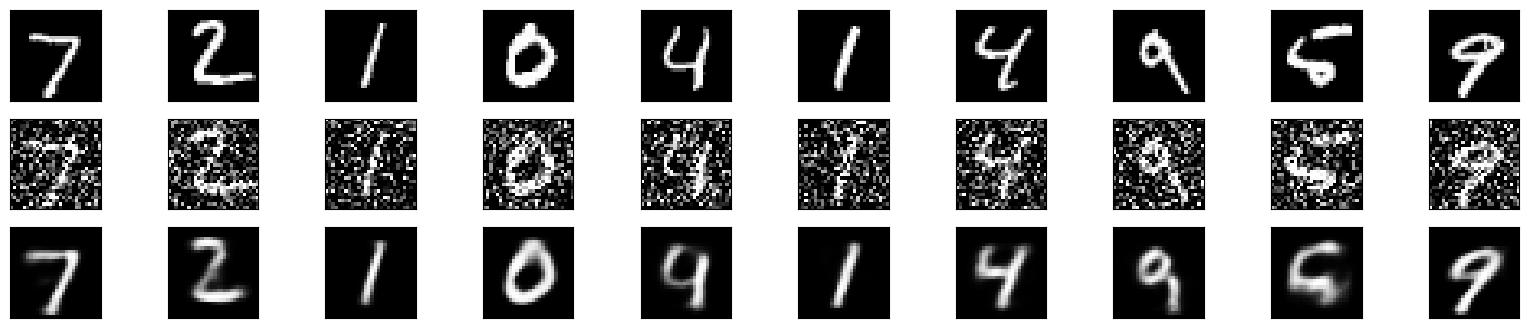

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.06)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##Dropout 0.04

Epoch 1/10
235/235 [==============================] - 10s 37ms/step - loss: 0.2551 - mse: 0.0641 - val_loss: 0.1782 - val_mse: 0.0383
Epoch 2/10
235/235 [==============================] - 8s 34ms/step - loss: 0.1708 - mse: 0.0357 - val_loss: 0.1516 - val_mse: 0.0292
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1546 - mse: 0.0303 - val_loss: 0.1407 - val_mse: 0.0256
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1467 - mse: 0.0277 - val_loss: 0.1348 - val_mse: 0.0236
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1419 - mse: 0.0261 - val_loss: 0.1309 - val_mse: 0.0223
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1385 - mse: 0.0249 - val_loss: 0.1277 - val_mse: 0.0213
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1359 - mse: 0.0241 - val_loss: 0.1251 - val_mse: 0.0204
Epoch 8/10
235/235 [==============================] - 5s 19ms/step -

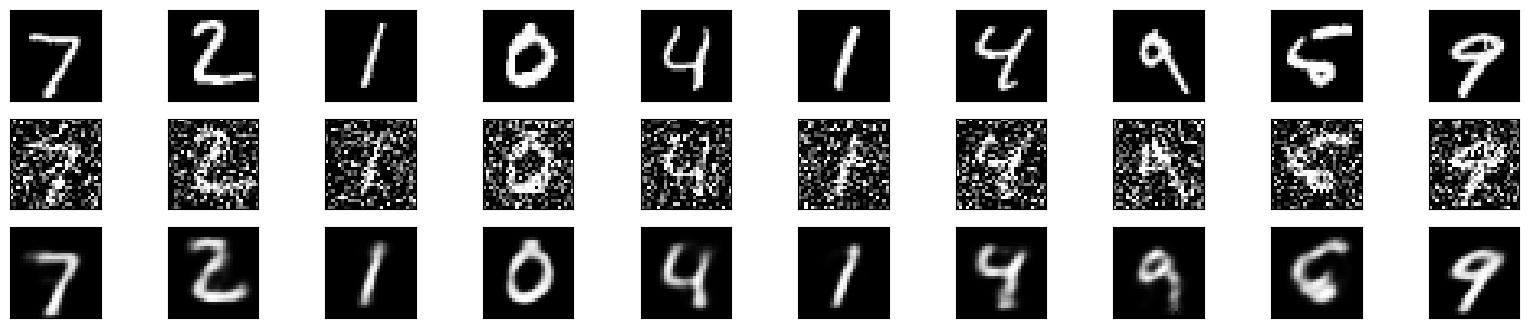

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder(dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder(dropout_rate=0.04)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##vaiable droput rates for layer

Epoch 1/30
235/235 [==============================] - 8s 26ms/step - loss: 0.2445 - mse: 0.0604 - val_loss: 0.1798 - val_mse: 0.0388
Epoch 2/30
235/235 [==============================] - 5s 20ms/step - loss: 0.1663 - mse: 0.0341 - val_loss: 0.1545 - val_mse: 0.0302
Epoch 3/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1495 - mse: 0.0285 - val_loss: 0.1434 - val_mse: 0.0265
Epoch 4/30
235/235 [==============================] - 7s 28ms/step - loss: 0.1408 - mse: 0.0256 - val_loss: 0.1365 - val_mse: 0.0243
Epoch 5/30
235/235 [==============================] - 4s 19ms/step - loss: 0.1351 - mse: 0.0237 - val_loss: 0.1322 - val_mse: 0.0229
Epoch 6/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1313 - mse: 0.0225 - val_loss: 0.1289 - val_mse: 0.0218
Epoch 7/30
235/235 [==============================] - 6s 26ms/step - loss: 0.1285 - mse: 0.0216 - val_loss: 0.1263 - val_mse: 0.0209
Epoch 8/30
235/235 [==============================] - 4s 18ms/step - 

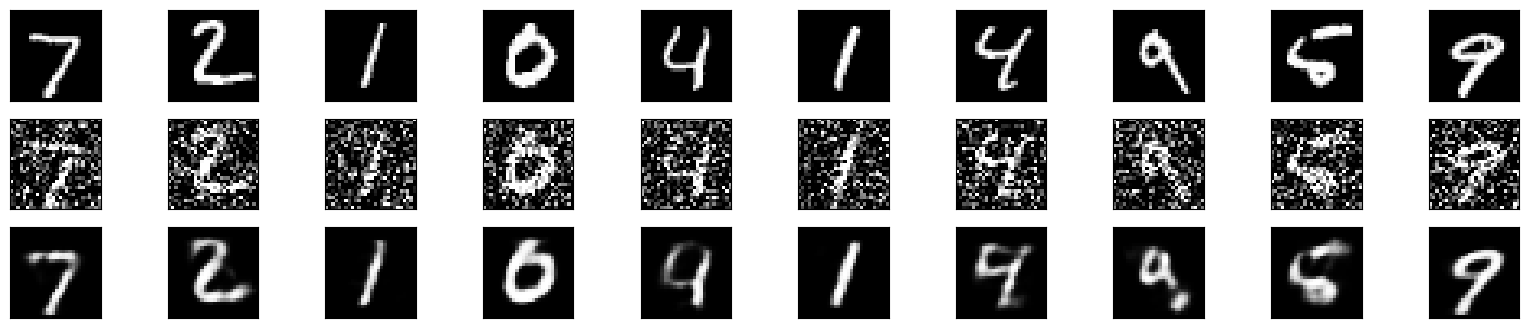

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


def create_denoising_autoencoder():
    model = Sequential([
        Dropout(0.2, input_shape=(784,)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(784, activation='sigmoid')
    ])
    return model

autoencoder = create_denoising_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['mse'])


autoencoder.fit(x_train_noisy, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
